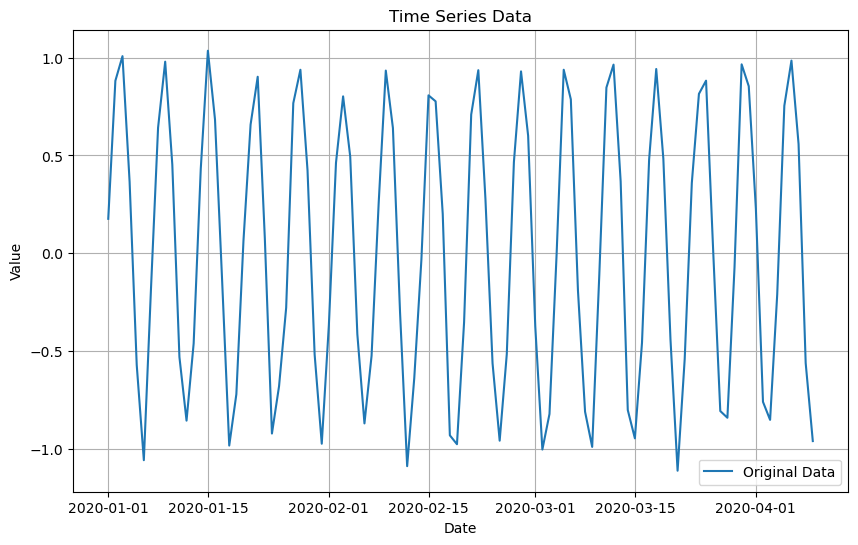

Train RMSE: 0.19071896329922433
Test RMSE: 0.17890037365907063


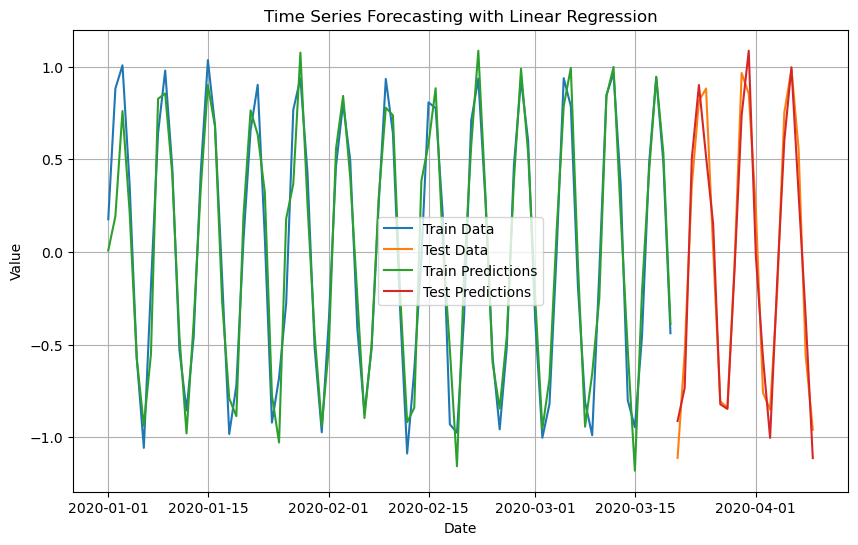

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic time series data
np.random.seed(0)
num_points = 100
time = pd.date_range(start='1/1/2020', periods=num_points, freq='D')
data = np.sin(np.arange(0, num_points)) + np.random.normal(0, 0.1, num_points)
df = pd.DataFrame({'Date': time, 'Value': data})

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], label='Original Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Prepare data for training
X = pd.DataFrame({'lag1': df['Value'].shift(1).fillna(0),
                  'lag2': df['Value'].shift(2).fillna(0)})
y = df['Value']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][:len(y_train)], y_train, label='Train Data')
plt.plot(df['Date'][len(y_train):], y_test, label='Test Data')
plt.plot(df['Date'][:len(y_train)], train_predictions, label='Train Predictions')
plt.plot(df['Date'][len(y_train):], test_predictions, label='Test Predictions')
plt.title('Time Series Forecasting with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


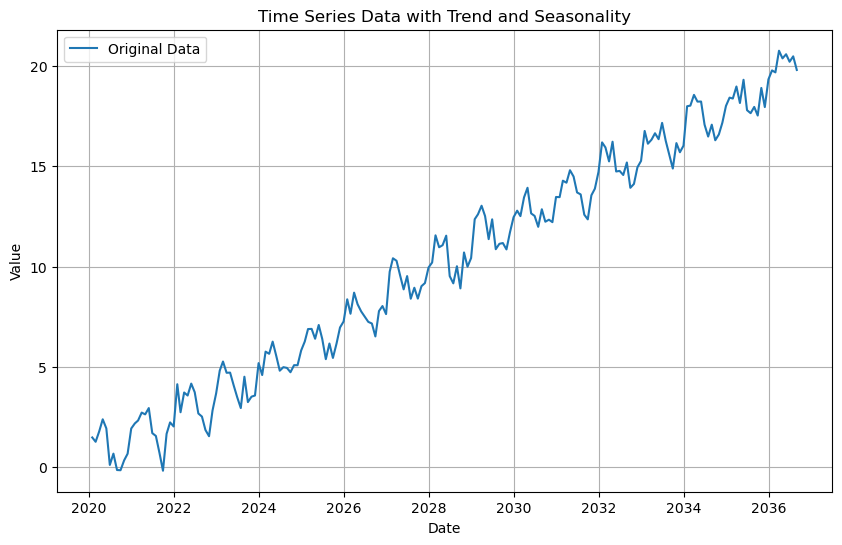

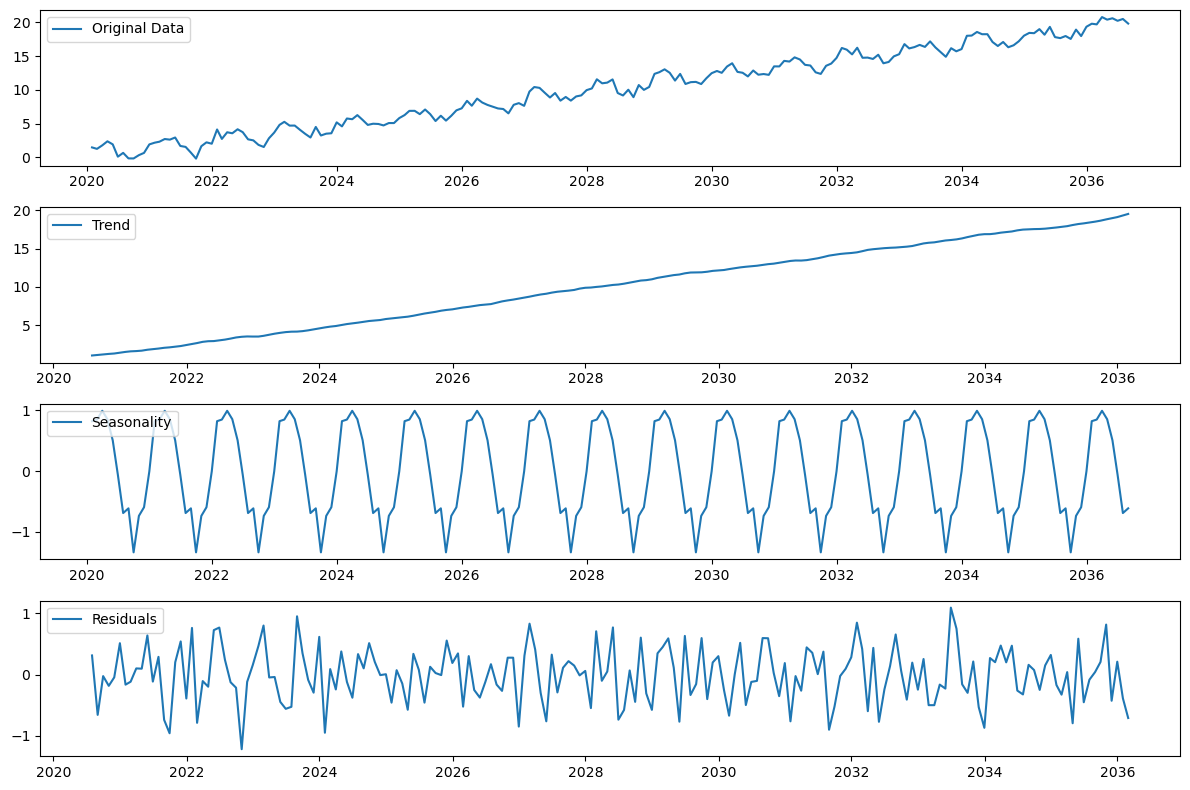

Test RMSE: 0.6902451754511386


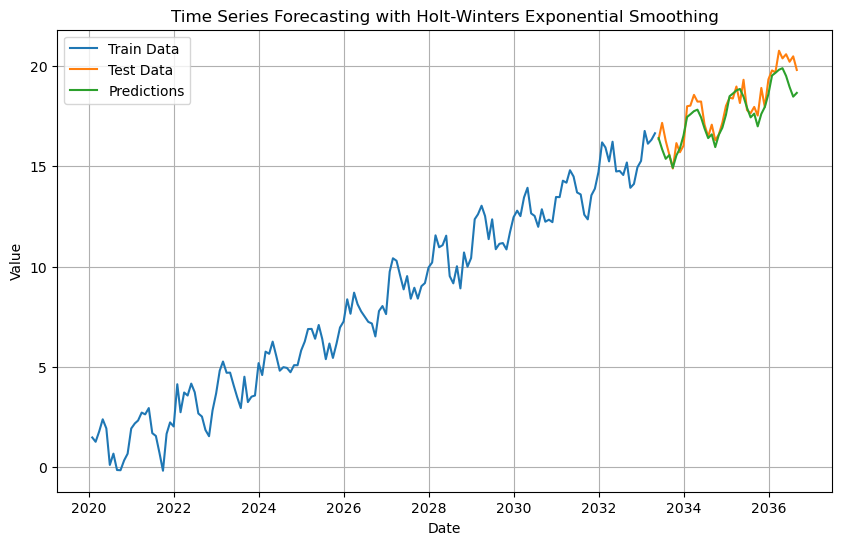

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Generate synthetic time series data with trend and seasonality
np.random.seed(0)
num_points = 200
time = pd.date_range(start='1/1/2020', periods=num_points, freq='M')
trend = np.arange(1, num_points + 1) * 0.1
seasonality = np.sin(np.arange(1, num_points + 1) * (2 * np.pi / 12))
data = trend + seasonality + np.random.normal(0, 0.5, num_points)
df = pd.DataFrame({'Date': time, 'Value': data})

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], label='Original Data')
plt.title('Time Series Data with Trend and Seasonality')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Decompose the time series into trend, seasonality, and residuals
result = seasonal_decompose(df['Value'], model='additive', period=12)

# Plot decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Date'], df['Value'], label='Original Data')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(df['Date'], result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(df['Date'], result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(df['Date'], result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit Holt-Winters Exponential Smoothing model
model = ExponentialSmoothing(train_data['Value'], seasonal_periods=12, trend='add', seasonal='add').fit()

# Make predictions
predictions = model.forecast(len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Value'], predictions))
print(f"Test RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Value'], label='Train Data')
plt.plot(test_data['Date'], test_data['Value'], label='Test Data')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('Time Series Forecasting with Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


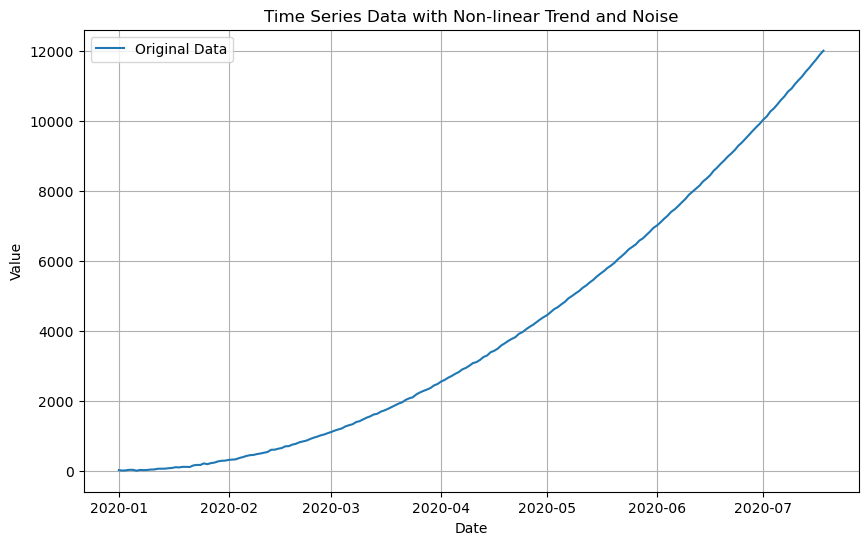

Test RMSE: 364.08724408262543


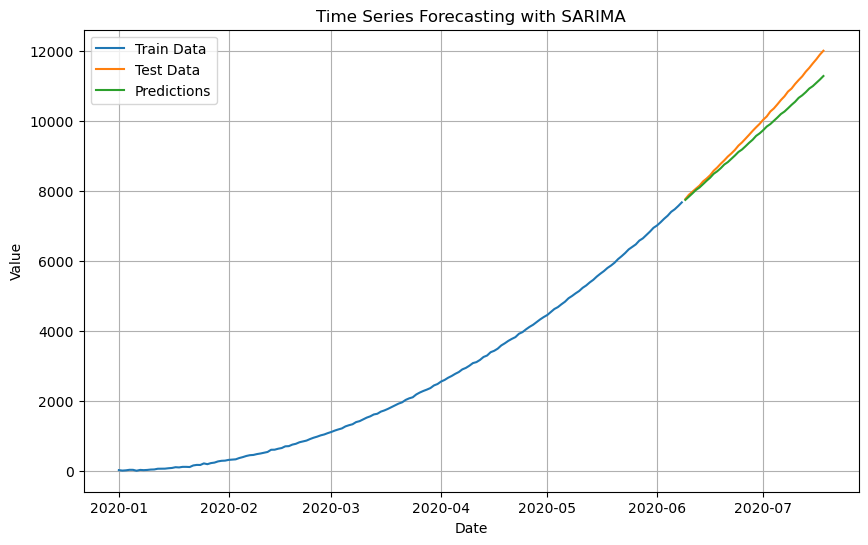

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Generate synthetic time series data with non-linear trend and noise
np.random.seed(0)
num_points = 200
time = pd.date_range(start='1/1/2020', periods=num_points, freq='D')
trend = 0.3 * np.square(np.arange(1, num_points + 1))
noise = np.random.normal(0, 10, num_points)
data = trend + noise
df = pd.DataFrame({'Date': time, 'Value': data})

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], label='Original Data')
plt.title('Time Series Data with Non-linear Trend and Noise')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit SARIMA model
model = SARIMAX(train_data['Value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = model.fit()

# Make predictions
predictions = sarima_results.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Value'], predictions))
print(f"Test RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Value'], label='Train Data')
plt.plot(test_data['Date'], test_data['Value'], label='Test Data')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('Time Series Forecasting with SARIMA')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


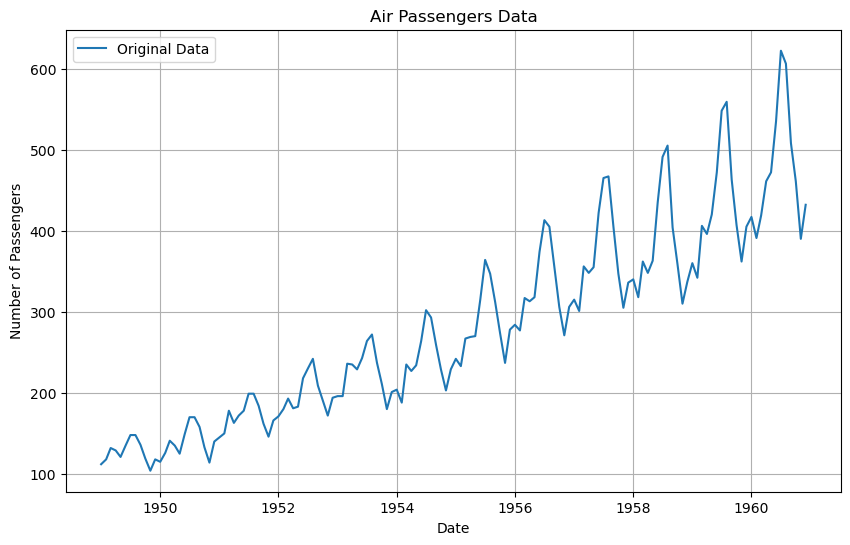

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Test RMSE: 30.141813002029618


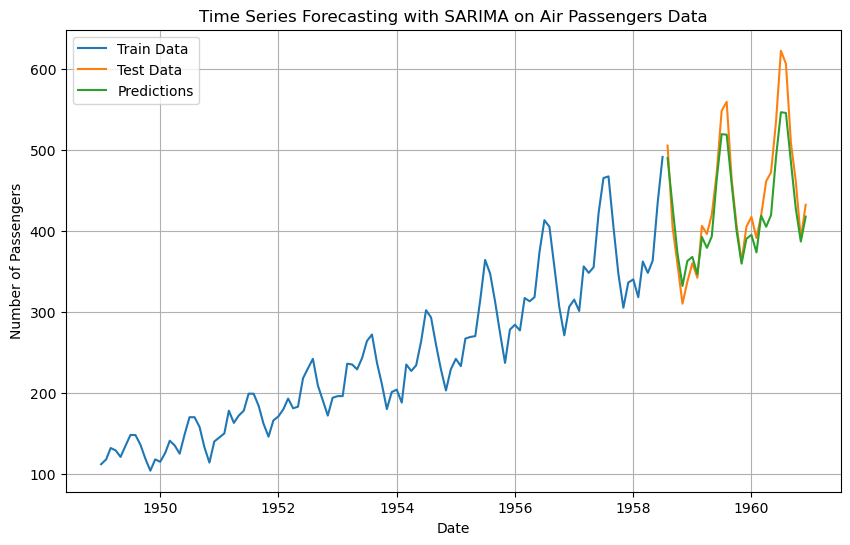

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the Air Passengers dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')

# Convert the 'Month' column to datetime format and set it as the index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'], label='Original Data')
plt.title('Air Passengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit SARIMA model
model = SARIMAX(train_data['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = model.fit()

# Make predictions
predictions = sarima_results.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Passengers'], predictions))
print(f"Test RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Passengers'], label='Train Data')
plt.plot(test_data.index, test_data['Passengers'], label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.title('Time Series Forecasting with SARIMA on Air Passengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


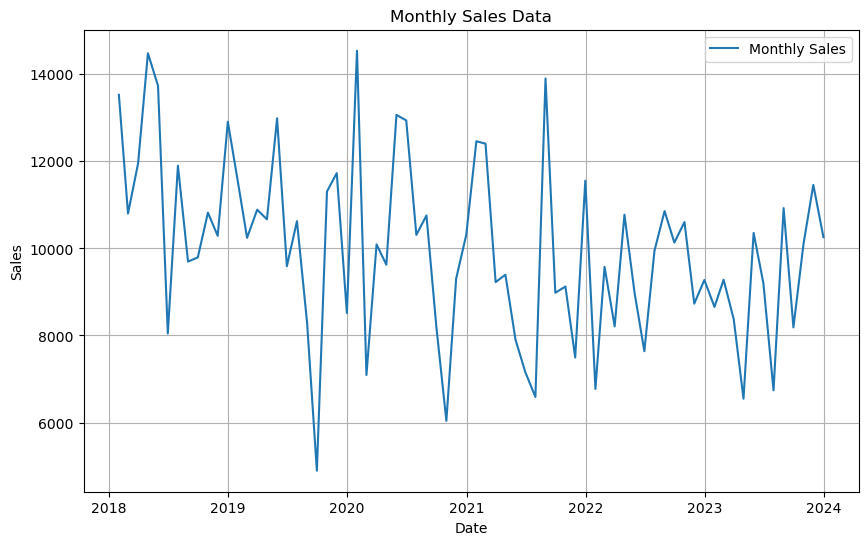

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 2496.0976627803225


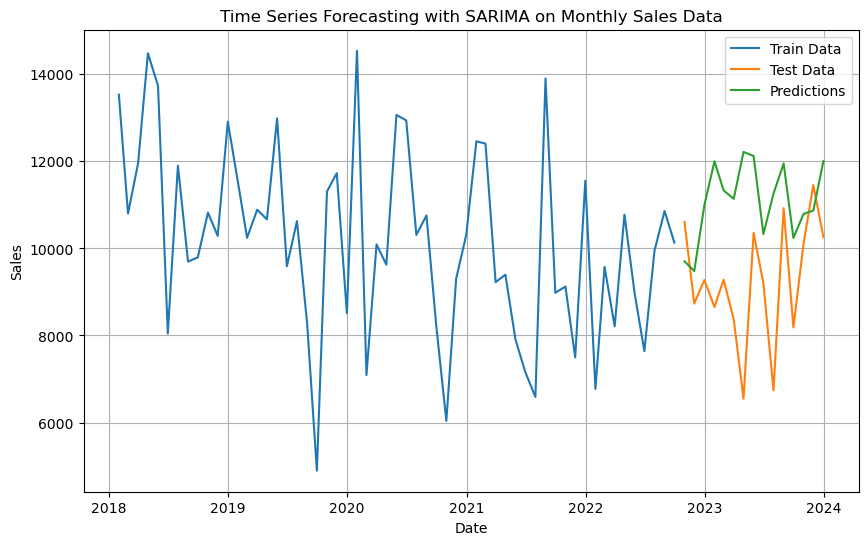

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Generate synthetic monthly sales data
np.random.seed(0)
start_date = '2018-01-01'
end_date = '2023-12-31'
dates = pd.date_range(start=start_date, end=end_date, freq='M')
sales = np.random.normal(loc=10000, scale=2000, size=len(dates))
sales = np.maximum(sales, 0)  # Ensure sales are non-negative
df = pd.DataFrame({'Date': dates, 'Sales': sales})

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sales'], label='Monthly Sales')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit SARIMA model
model = SARIMAX(train_data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = model.fit()

# Make predictions
predictions = sarima_results.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Sales'], predictions))
print(f"Test RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Sales'], label='Train Data')
plt.plot(test_data['Date'], test_data['Sales'], label='Test Data')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('Time Series Forecasting with SARIMA on Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


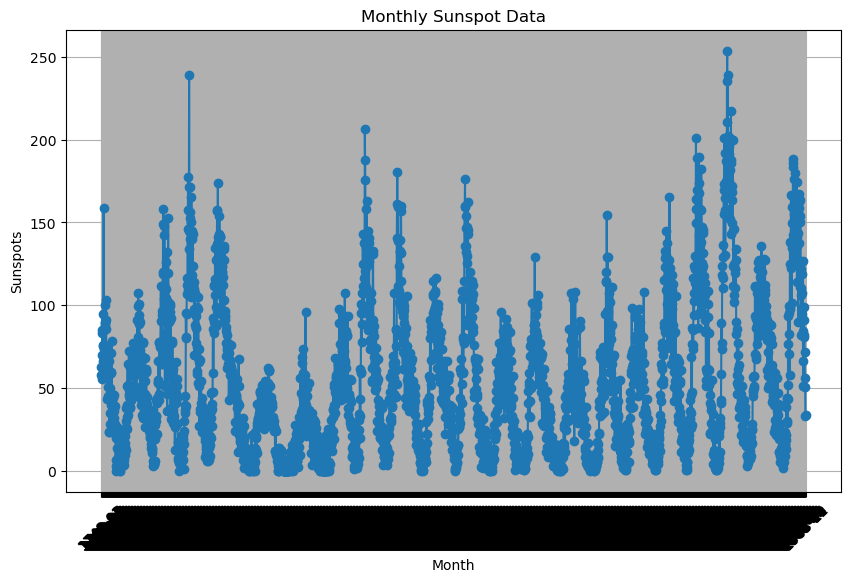

Test RMSE: 62.6761517866622


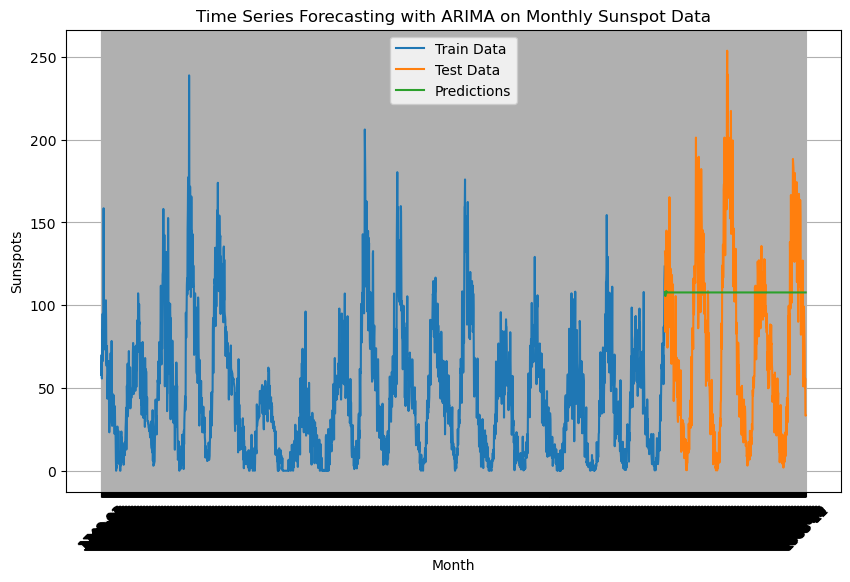

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the monthly sunspot dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Sunspots'], marker='o', linestyle='-')
plt.title('Monthly Sunspot Data')
plt.xlabel('Month')
plt.ylabel('Sunspots')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['Sunspots'], order=(5,1,0))
arima_results = model.fit()

# Make predictions
predictions = arima_results.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Sunspots'], predictions))
print(f"Test RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data['Month'], train_data['Sunspots'], label='Train Data')
plt.plot(test_data['Month'], test_data['Sunspots'], label='Test Data')
plt.plot(test_data['Month'], predictions, label='Predictions')
plt.title('Time Series Forecasting with ARIMA on Monthly Sunspot Data')
plt.xlabel('Month')
plt.ylabel('Sunspots')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


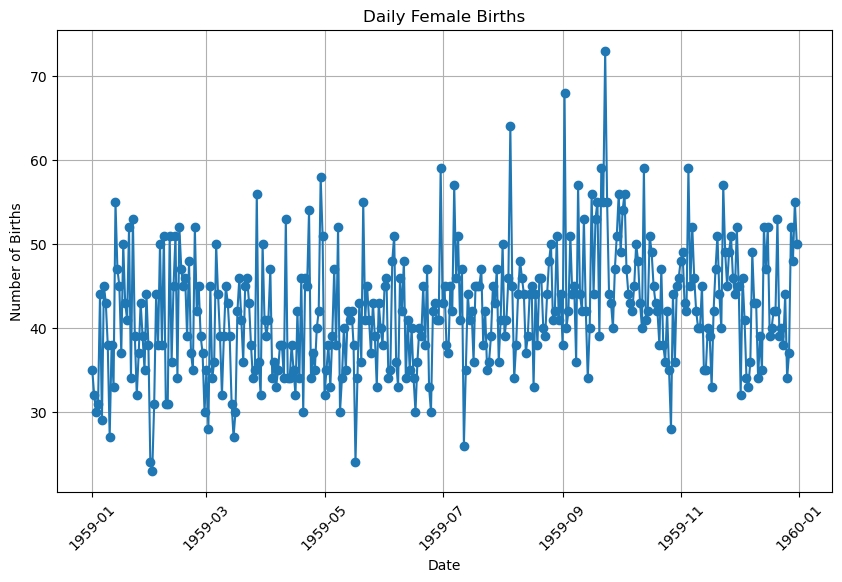

Test RMSE: 6.844619763148721


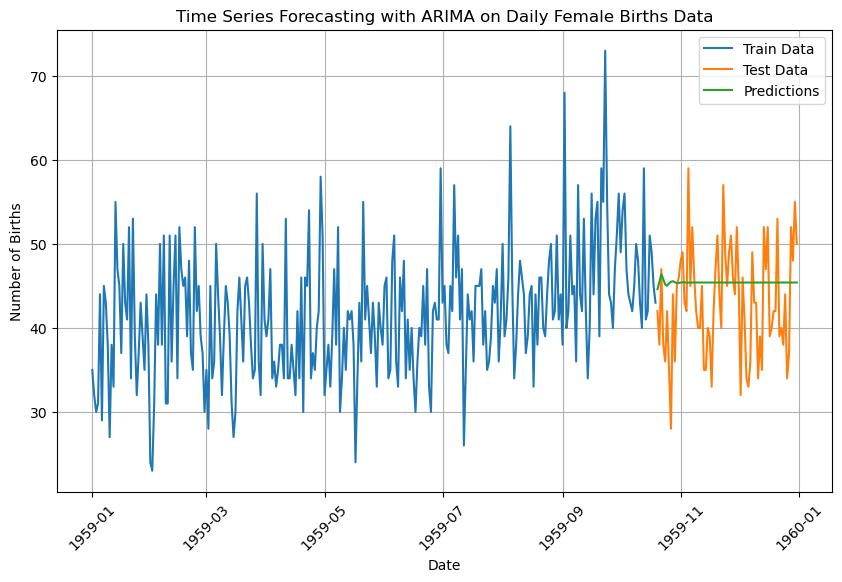

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the Daily Female Births dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"
df = pd.read_csv(url)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Births'], marker='o', linestyle='-')
plt.title('Daily Female Births')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['Births'], order=(5,1,0))
arima_results = model.fit()

# Make predictions
predictions = arima_results.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Births'], predictions))
print(f"Test RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Births'], label='Train Data')
plt.plot(test_data['Date'], test_data['Births'], label='Test Data')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('Time Series Forecasting with ARIMA on Daily Female Births Data')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
